In [1]:
#Importing Necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
import os 
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

In [4]:
train = pd.read_csv("train_LZV4RXX.csv") # Load training dataset
test = pd.read_csv("test_4zJg83n.csv") # Load test dataset
submission = pd.read_csv("sample_submission_tbPU9qQ.csv") # Load final submission dataset

In [5]:
print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print("--------------------------------------------------------------------------------------------------------------")

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print("--------------------------------------------------------------------------------------------------------------")

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print("--------------------------------------------------------------------------------------------------------------")


Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB
None 

Shape of Train Data:-

(7000, 10) 

--------------------------------------------------------------------------------------------------------------

Data Types in Test Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 

In [6]:
print("About Train Data:-\n")
print(train.head(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')

About Train Data:-

   loan_id  age  education proof_submitted  loan_amount  asset_cost  \
0        1   27        1.0          Aadhar       504264      820920   
1        2   48        1.0          Aadhar       728556      831444   
2        3   30        2.0         VoterID       642936      826092   
3        4   28        1.0          Aadhar       746556      930924   
4        5   29        1.0          Aadhar      1139880     1902000   

   no_of_loans  no_of_curr_loans  last_delinq_none  loan_default  
0            2                 2                 0             0  
1            6                 2                 0             0  
2            0                 0                 0             1  
3            0                 0                 0             0  
4            0                 0                 0             0   

--------------------------------------------------------------------------------------------------------------

About Test Data:-

   loan_id  age  e

In [7]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')

About Train Data:-

      loan_id  age  education proof_submitted  loan_amount  asset_cost  \
6995     6996   45        2.0          Aadhar       930948     1258344   
6996     6997   41        2.0          Aadhar       681108      791040   
6997     6998   47        2.0          Aadhar       627636      720336   
6998     6999   39        1.0          Aadhar       654708      793860   
6999     7000   31        1.0          Aadhar       705108      900660   

      no_of_loans  no_of_curr_loans  last_delinq_none  loan_default  
6995            0                 0                 0             1  
6996            4                 4                 0             1  
6997           35                11                 0             1  
6998            0                 0                 0             1  
6999            0                 0                 0             0   

--------------------------------------------------------------------------------------------------------------

A

In [8]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,6755.000000,7000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
unique,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Aadhar,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,5931,NaN,NaN,NaN,NaN,NaN,NaN
mean,3500.500000,36.096571,1.561954,NaN,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,0.496184,NaN,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.000000,NaN,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,NaN,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,NaN,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,NaN,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000


In [9]:
test.describe(include='all')

# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
count,3000.000000,3000.000000,2908.000000,3000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
unique,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Aadhar,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2545,NaN,NaN,NaN,NaN,NaN
mean,8500.500000,36.111000,1.563618,NaN,6.629294e+05,9.106000e+05,2.819000,1.374333,0.014333
std,866.169729,7.467347,0.496022,NaN,1.451009e+05,2.070278e+05,5.329575,2.218825,0.118881
min,7001.000000,21.000000,1.000000,NaN,1.696800e+05,4.706040e+05,0.000000,0.000000,0.000000
25%,7750.750000,30.000000,1.000000,NaN,5.801880e+05,7.930710e+05,0.000000,0.000000,0.000000
50%,8500.500000,36.000000,2.000000,NaN,6.541560e+05,8.569080e+05,0.000000,0.000000,0.000000
75%,9250.250000,42.000000,2.000000,NaN,7.315590e+05,9.501360e+05,4.000000,2.000000,0.000000


In [10]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
loan_id,0,0.0
age,0,0.0
education,245,3.5
proof_submitted,0,0.0
loan_amount,0,0.0
asset_cost,0,0.0
no_of_loans,0,0.0
no_of_curr_loans,0,0.0
last_delinq_none,0,0.0
loan_default,0,0.0


In [11]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
loan_id,0,0.000000
age,0,0.000000
education,92,3.066667
proof_submitted,0,0.000000
loan_amount,0,0.000000
asset_cost,0,0.000000
no_of_loans,0,0.000000
no_of_curr_loans,0,0.000000
last_delinq_none,0,0.000000


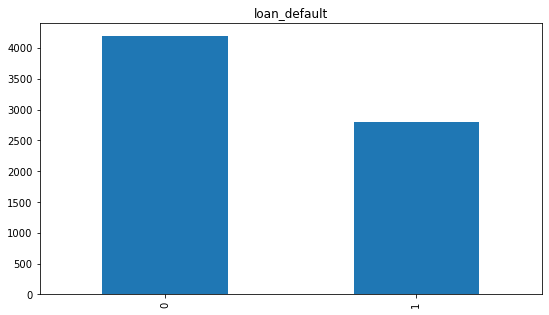

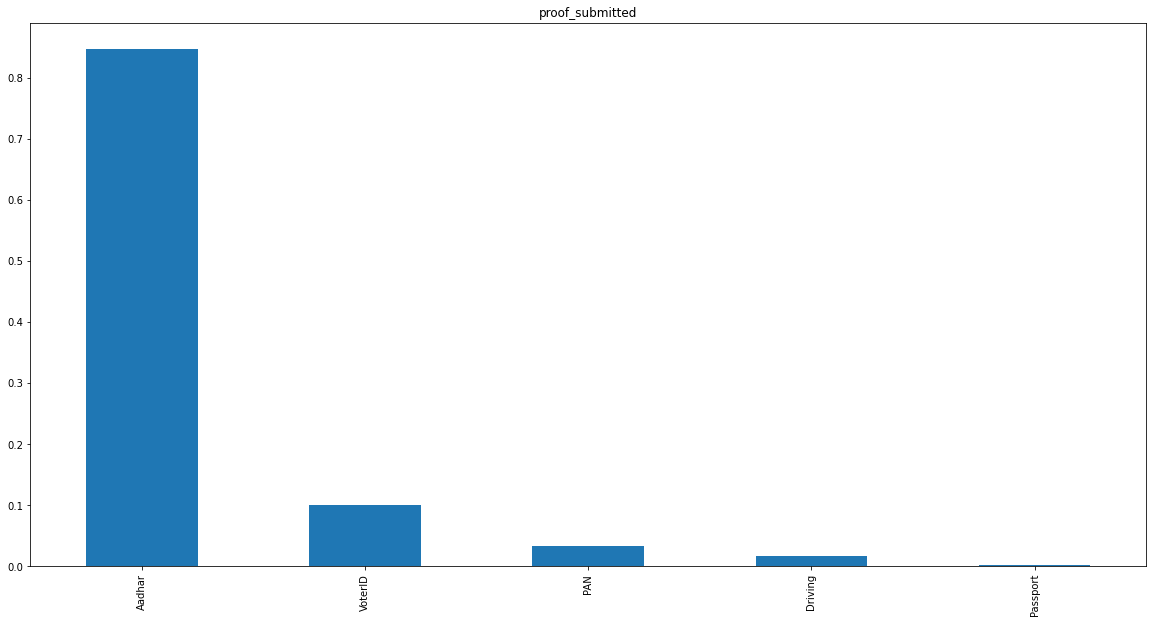

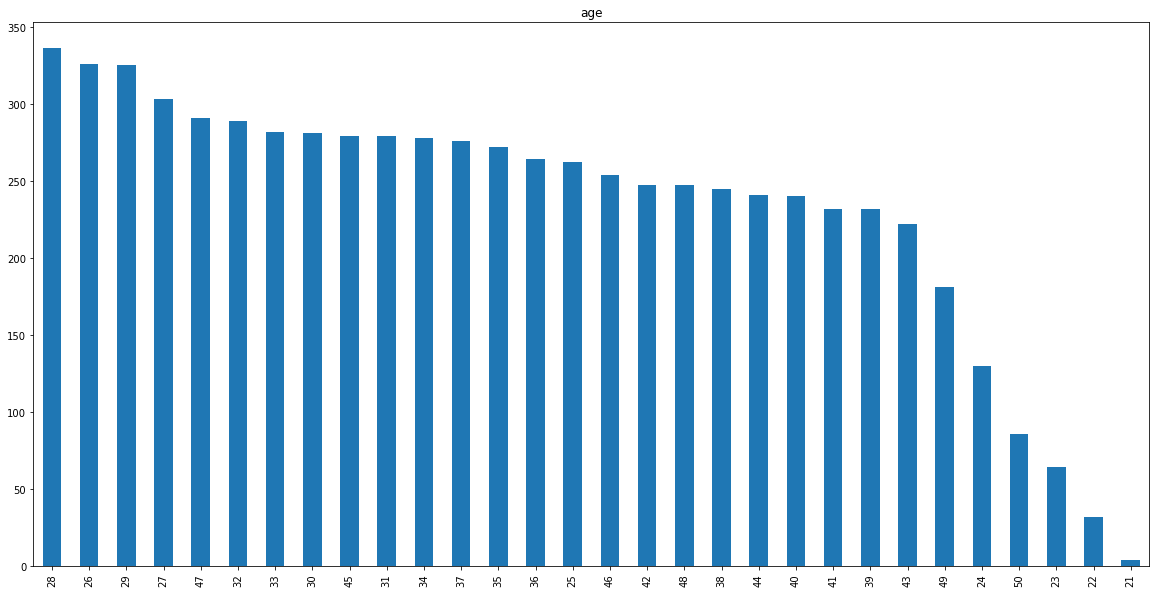

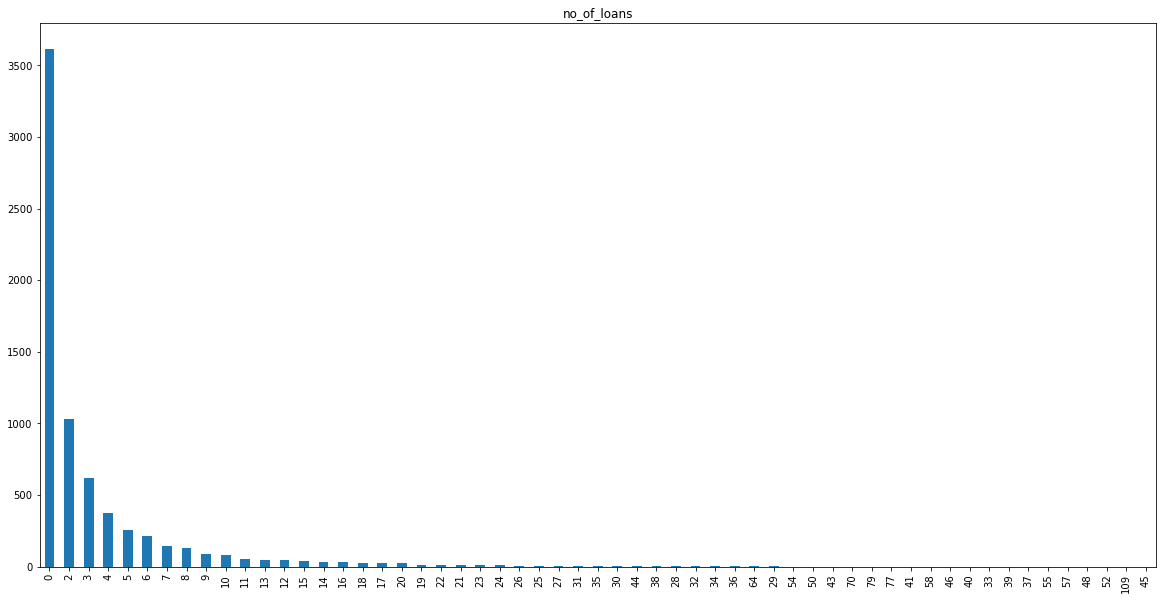

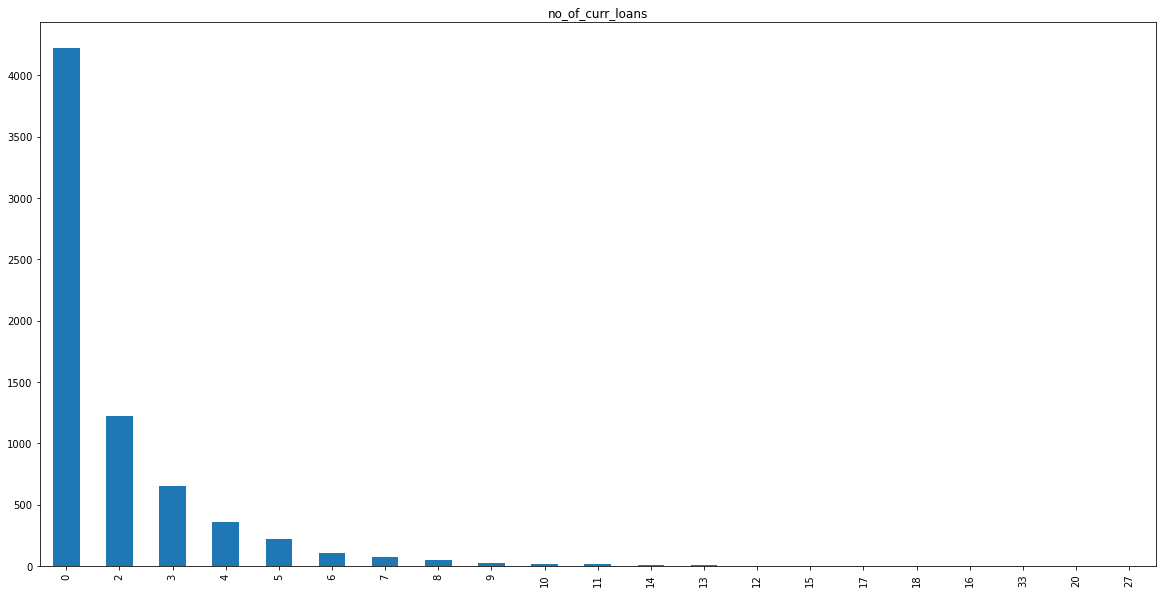

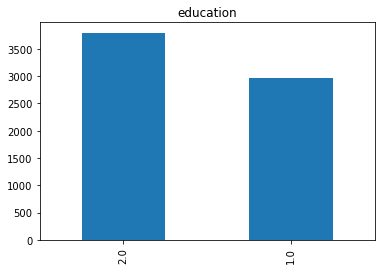

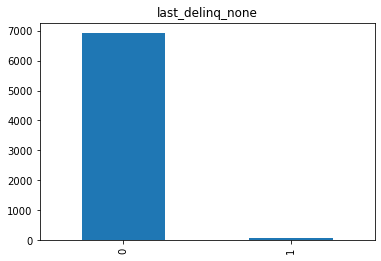

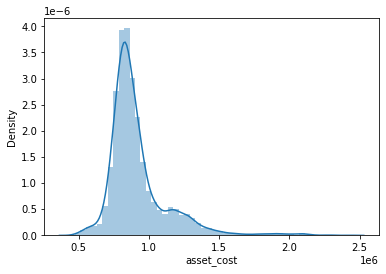

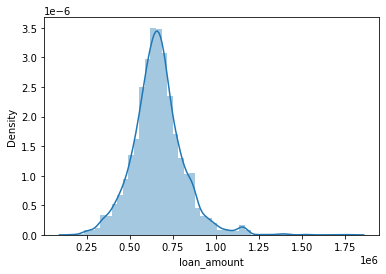

In [12]:
#EDA

train['loan_default'].value_counts().plot.bar(figsize=(9,5), title='loan_default')
plt.show()
train['proof_submitted'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='proof_submitted')
plt.show()
train['age'].value_counts().plot.bar(figsize=(20,10), title='age')
plt.show()
train['no_of_loans'].value_counts().plot.bar(figsize=(20,10), title='no_of_loans')
plt.show()
train['no_of_curr_loans'].value_counts().plot.bar(figsize=(20,10), title='no_of_curr_loans')
plt.show()
train['education'].value_counts().plot.bar(title='education')
plt.show()
train['last_delinq_none'].value_counts().plot.bar(title='last_delinq_none')
plt.show()
sns.distplot(train['asset_cost'])
plt.show()
sns.distplot(train['loan_amount'])
plt.show()

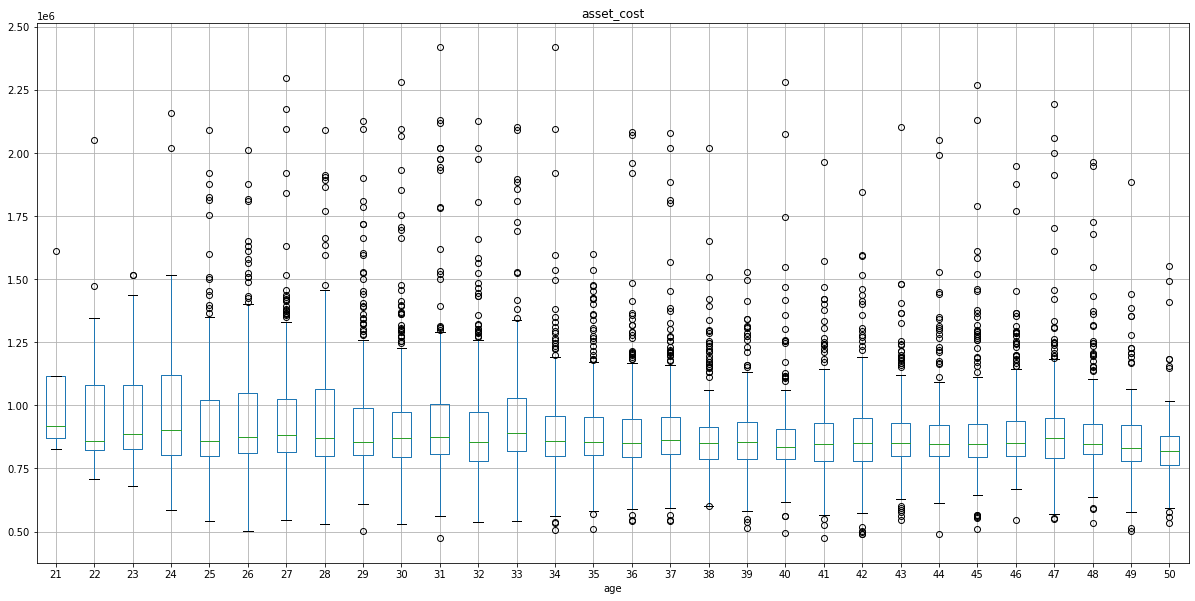

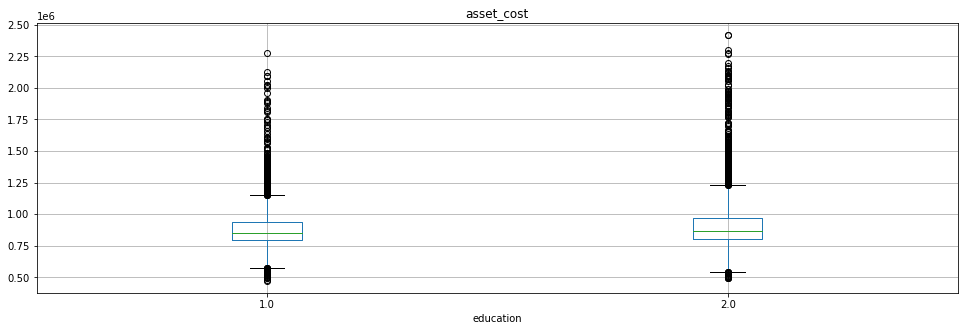

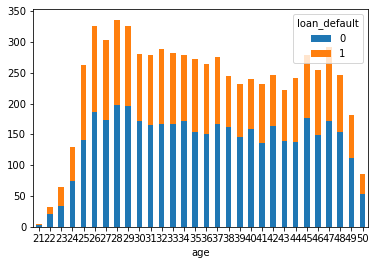

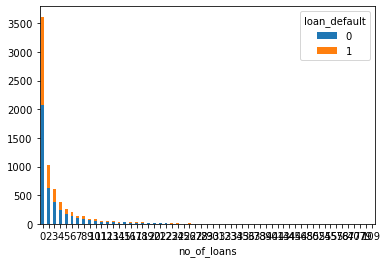

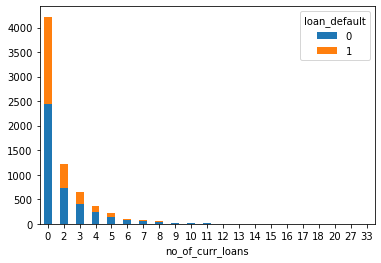

In [13]:
#Exploring independent variables vs target variables
train.boxplot(column='asset_cost', by = 'age',figsize=(20,10)) 
plt.suptitle('')
train.boxplot(column='asset_cost', by = 'education',figsize=(16,5)) 
plt.suptitle('')
ct=pd.crosstab(train['age'],train['loan_default'])
ct.plot(kind="bar",stacked=True,rot=0)
plt.show()
nlt=pd.crosstab(train['no_of_loans'],train['loan_default'])
nlt.plot(kind="bar",stacked=True,rot=0)
plt.show()
nlct=pd.crosstab(train['no_of_curr_loans'],train['loan_default'])
nlct.plot(kind="bar",stacked=True,rot=0)
plt.show()

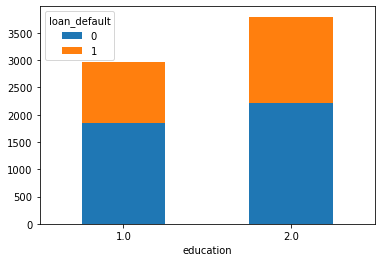

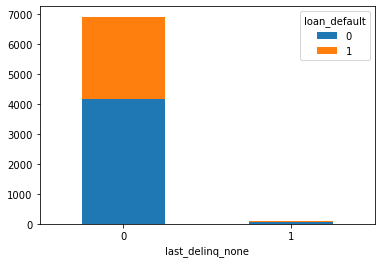

In [14]:
#crosstab between variables
et=pd.crosstab(train['education'],train['loan_default'])
et.plot(kind="bar",stacked=True,rot=0)
plt.show()
lt=pd.crosstab(train['last_delinq_none'],train['loan_default'])
lt.plot(kind="bar",stacked=True,rot=0)
plt.show()

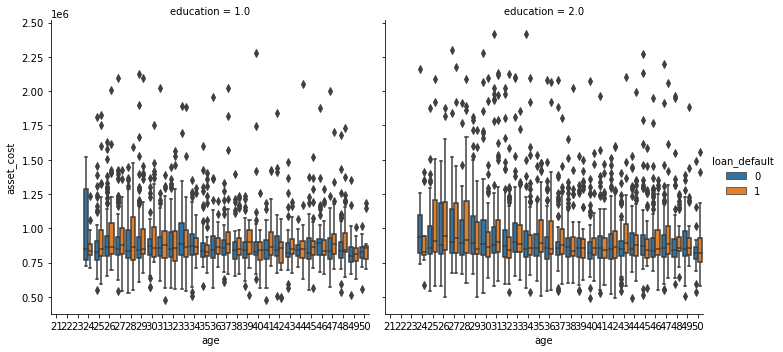

In [15]:
 #Variable - 'Asset_cost' Vs 'Loan_Default'
sns.catplot(x='age',y='asset_cost',data=train,kind='box',hue='loan_default', col='education')

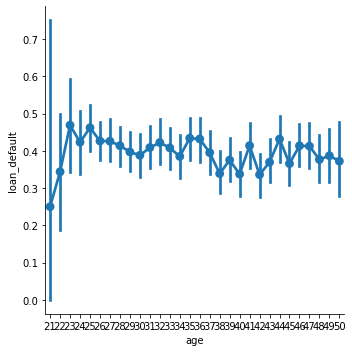

In [16]:
#Catplot - 'Education' Vs 'Loan_Default' 
sns.catplot(x='age',y='loan_default',kind='point',data=train)

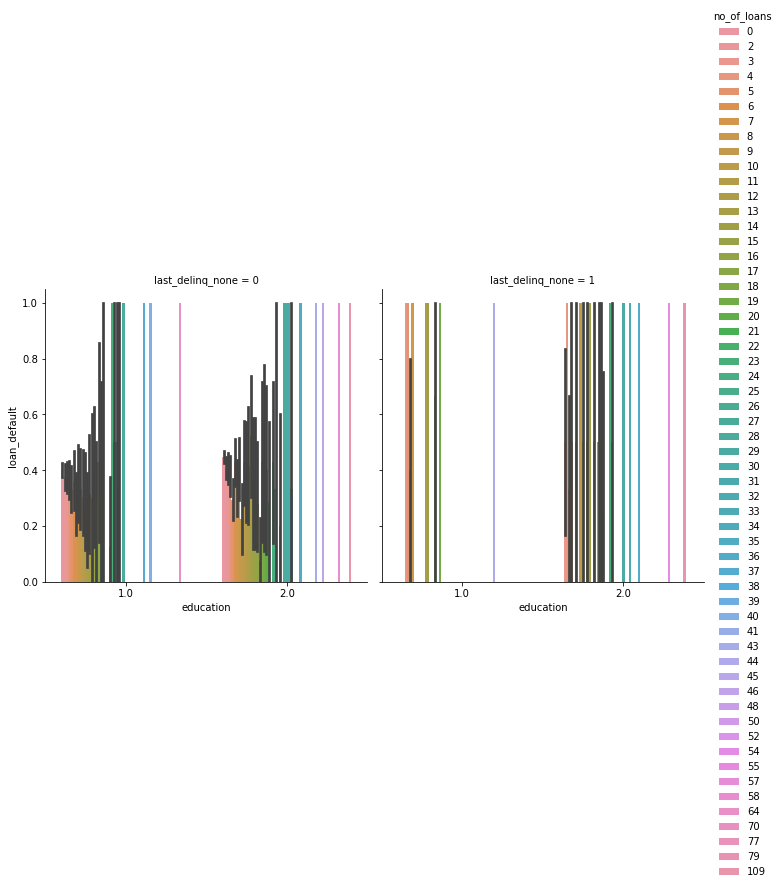

In [17]:
#Catplot - 'Education' Vs 'Loan_default'
sns.catplot(x='education',y='loan_default',kind='bar',data=train,col='last_delinq_none',hue='no_of_loans')

In [18]:
#filling missing values
train['education'].fillna(train['education'].value_counts().index[0], inplace=True)
test['education'].fillna(test['education'].value_counts().index[0], inplace=True)

In [19]:
train.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [20]:
test.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
dtype: int64

In [22]:
#label encoding 
train["proof_submitted"] = train["proof_submitted"].map({"Aadhar": 0, "VoterID": 1,"PAN": 2, "Driving": 3, "passport":4})
test["proof_submitted"] = test["proof_submitted"].map({"Aadhar": 0, "VoterID": 1,"PAN": 2, "Driving": 3, "passport":4})

In [23]:
# copying loan id from test to submission file
submission = pd.DataFrame()
submission['loan_id'] = test['loan_id']

In [24]:
#dropping unwanted columns 
train.drop(['loan_id'],axis=1,inplace=True)
test.drop(['loan_id'],axis=1,inplace=True)

<AxesSubplot:>

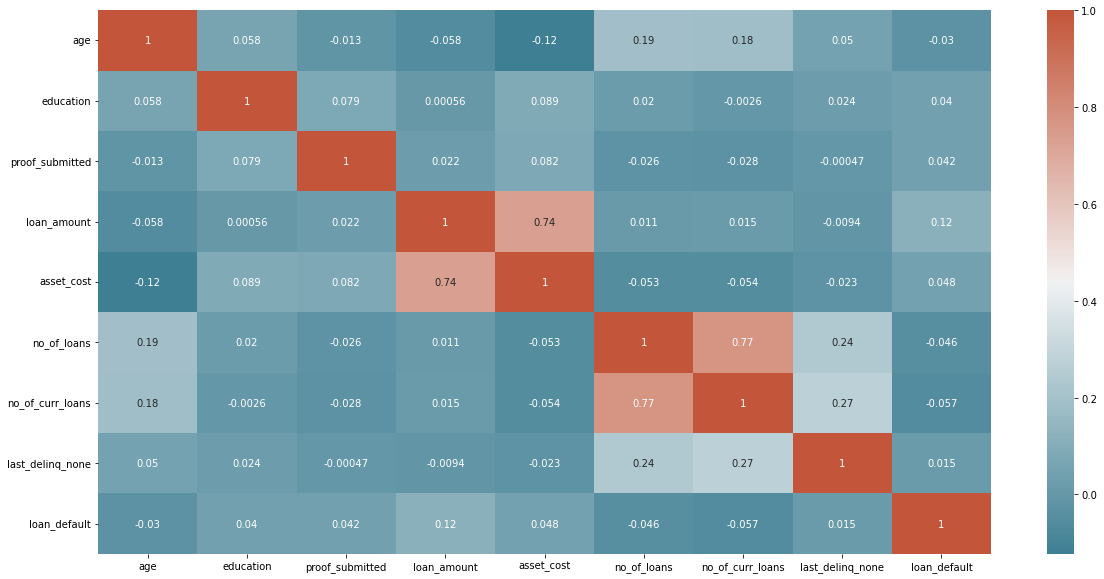

In [25]:
#plotting correlation heatmap
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7000 non-null   int64  
 1   education         7000 non-null   float64
 2   proof_submitted   6987 non-null   float64
 3   loan_amount       7000 non-null   int64  
 4   asset_cost        7000 non-null   int64  
 5   no_of_loans       7000 non-null   int64  
 6   no_of_curr_loans  7000 non-null   int64  
 7   last_delinq_none  7000 non-null   int64  
 8   loan_default      7000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 492.3 KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3000 non-null   int64  
 1   education         3000 non-null   float64
 2   proof_submitted   2995 non-null   float64
 3   loan_amount       3000 non-null   int64  
 4   asset_cost        3000 non-null   int64  
 5   no_of_loans       3000 non-null   int64  
 6   no_of_curr_loans  3000 non-null   int64  
 7   last_delinq_none  3000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 187.6 KB


In [28]:
print("Shape of Final Processed Train Data is:-\n",train.shape,'\n')
print("------------------------------------------------------------------------------------------------------------")

print("Shape of Final Processed Test Data is:-\n",test.shape,'\n')

print("------------------------------------------------------------------------------------------------------------")
print("\nColumns in the Final Processed Train Data\n",train.columns,'\n')

print("\nColumns in the Final Processed Train Data\n",test.columns,'\n')

print("------------------------------------------------------------------------------------------------------------")


Shape of Final Processed Train Data is:-
 (7000, 9) 

------------------------------------------------------------------------------------------------------------
Shape of Final Processed Test Data is:-
 (3000, 8) 

------------------------------------------------------------------------------------------------------------

Columns in the Final Processed Train Data
 Index(['age', 'education', 'proof_submitted', 'loan_amount', 'asset_cost',
       'no_of_loans', 'no_of_curr_loans', 'last_delinq_none', 'loan_default'],
      dtype='object') 


Columns in the Final Processed Train Data
 Index(['age', 'education', 'proof_submitted', 'loan_amount', 'asset_cost',
       'no_of_loans', 'no_of_curr_loans', 'last_delinq_none'],
      dtype='object') 

------------------------------------------------------------------------------------------------------------


In [29]:
train_temp,test_temp=train_test_split(train,test_size=0.20,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='loan_default'

features.remove(label)

print("--------------------------------------------------------------------------------------------------------\n\n")
print("\nFEATURES ARE:-",features)

print("--------------------------------------------------------------------------------------------------------\n\n")
print("\nLABELS ARE:-",label)

print("--------------------------------------------------------------------------------------------------------\n\n")

# To check the data points in "Train" & "Test" datasets after split
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

Length of Original Data:- 7000 
Length of Train Data:- 5600 
Length of Test Data:- 1400
--------------------------------------------------------------------------------------------------------



FEATURES ARE:- ['age', 'education', 'proof_submitted', 'loan_amount', 'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none']
--------------------------------------------------------------------------------------------------------



LABELS ARE:- loan_default
--------------------------------------------------------------------------------------------------------




In [31]:
#Importing ML algorithms from library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

In [32]:
#Using catboost classifier
catb = CatBoostClassifier(max_depth=8, n_estimators=3000)

catb.fit(X_train,y_train) 

print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(catb.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(catb.score(X_test, y_test)))

print("----------------------------------------------------------------------------------------------------------------------")

print('CatBoost Classification Report of the training data:\n\n',classification_report(y_test,catb.predict(X_test)),'\n')

Learning rate set to 0.00785
0:	learn: 0.6925726	total: 186ms	remaining: 9m 18s
1:	learn: 0.6920550	total: 208ms	remaining: 5m 11s
2:	learn: 0.6915544	total: 228ms	remaining: 3m 48s
3:	learn: 0.6909402	total: 247ms	remaining: 3m 4s
4:	learn: 0.6903724	total: 265ms	remaining: 2m 38s
5:	learn: 0.6898046	total: 283ms	remaining: 2m 21s
6:	learn: 0.6893300	total: 300ms	remaining: 2m 8s
7:	learn: 0.6887211	total: 318ms	remaining: 1m 58s
8:	learn: 0.6881775	total: 335ms	remaining: 1m 51s
9:	learn: 0.6875994	total: 353ms	remaining: 1m 45s
10:	learn: 0.6870791	total: 370ms	remaining: 1m 40s
11:	learn: 0.6866924	total: 379ms	remaining: 1m 34s
12:	learn: 0.6862280	total: 397ms	remaining: 1m 31s
13:	learn: 0.6857308	total: 418ms	remaining: 1m 29s
14:	learn: 0.6852524	total: 436ms	remaining: 1m 26s
15:	learn: 0.6847035	total: 455ms	remaining: 1m 24s
16:	learn: 0.6842359	total: 476ms	remaining: 1m 23s
17:	learn: 0.6837727	total: 494ms	remaining: 1m 21s
18:	learn: 0.6832180	total: 514ms	remaining: 1m

In [33]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using above Tuned Mode

y_pred = catb.predict(x)

print(y_pred)

[0 0 0 ... 0 0 0]


In [34]:
# Save in Dataframe
df1=pd.DataFrame(y_pred,columns=['loan_default'])

a=pd.Series(submission['loan_id'],name='loan_id')

final_pred = pd.concat([a,df1], axis=1) 

final_pred.head()

final_pred.to_csv('sample.csv',index=False)


print("Process Completed")


Process Completed
